# FLOW, inc. 若水國際 Disability Employment Analysis

## 探討的問題
1. 我們是否可以找到外在特質和內在特質的 correlation?
2. 如果 1. 可行，我們是否可以只利用外在特質成功判斷 candidate 是否為關鍵 TA?
3. 我們是否可以加上基本分析找出關鍵 TA的管道給若水一個 insight

## Layout
1. 文字雲定義六大特質
2. 基本資料分析
    - 關鍵TA雷達圖 vs 非關鍵TA雷達圖
    - 關鍵TA學歷分析
    - 關鍵TA求職考量分析
    - 關鍵TA經歷分析
    - 關鍵TA管道分析
3. Feature Correlation 特質關係度分析
4. 建模預測特質與

In [1]:
import pandas as pd
import numpy as np
from typing import List
import os
os.chdir("/Users/frankcholula/Workspace/work/flow/flow-disability-employment")
!ls

README.md                   poetry.lock
dashboard.py                pyproject.toml
data                        score_exploration.ipynb
interview_exploration.ipynb


In [2]:
from sklearn.preprocessing import OrdinalEncoder
FILE_PATH = "./data/scores.csv"
inside_features = ['工作意願和動機', '學習動力','基本溝通表達', '工作責任感', '解決問題意願']
outside_features = ['社群和社交活動', '家人支持程度', '私人企業工作經驗', '量化求職考量','先天後天', '自我身心照顧']
meta_features = ['受訪者','內外部','障別','問卷求職管道','問卷學歷','經歷','求職考量']
target = '關鍵TA'
edu_encoder = OrdinalEncoder(categories = [['國中', '高中/職', '大學/大專', '研究所']])
ta_encoder = OrdinalEncoder(categories = [['F','T']])
def read_data(file_path, ppss=False) -> List[pd.DataFrame]:
    """
    Read data from csv file and return 3 dataframes
    """
    scores_df = pd.read_csv(file_path)
    if not ppss:
        scores_df = scores_df[meta_features + inside_features + outside_features + [target]] 
    # slight pre-processing here using ordinal encoder    
    scores_df["關鍵TA"] = ta_encoder.fit_transform(scores_df[["關鍵TA"]])
    scores_df["問卷學歷"] = edu_encoder.fit_transform(scores_df[["問卷學歷"]])
    ta_df = scores_df[scores_df["關鍵TA"] == 1]
    ta_df.reset_index(drop=True, inplace=True)
    nonta_df = scores_df[scores_df["關鍵TA"] == 0]
    nonta_df.reset_index(drop=True, inplace=True)
    num_ta, num_nonta = len(ta_df), len(nonta_df)
    print(f"關鍵TA: {num_ta} 位 \n非關鍵TA: {num_nonta} 位")
    return [scores_df, ta_df, nonta_df]

scores_df, ta_df, nonta_df = read_data(FILE_PATH)
inside_df = scores_df[scores_df["內外部"]=="內部"].reset_index(drop=True)
outside_df = scores_df[scores_df["內外部"]=="外部"].reset_index(drop=True)
inside_ta_df = ta_df[ta_df["內外部"]=="內部"].reset_index(drop=True)
outside_ta_df = ta_df[ta_df["內外部"]=="外部"].reset_index(drop=True)
scores_df

關鍵TA: 24 位 
非關鍵TA: 13 位


,受訪者,內外部,障別,問卷求職管道,問卷學歷,經歷,求職考量,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,社群和社交活動,家人支持程度,私人企業工作經驗,量化求職考量,先天後天,自我身心照顧,關鍵TA
0,0913H,外部,腦性麻痺,社群貼文,3.0,學校,無障礙環境、工作性質與內容,4,3,3,3,3,2,2,0,3,1,6,1.0
1,0913I,外部,脊髓損傷,網路人力銀行、親友介紹,0.0,非營利組織,經濟需求、無障礙環境,2,1,0,1,0,2,1,0,1,0,2,0.0
2,0915J,外部,腦性麻痺,網路人力銀行、公立政府就業服務、自行創業/自由接案,2.0,學校,經濟需求、工作性質與內容,5,2,2,3,2,2,1,0,1,1,6,1.0
3,0916K,外部,聽障,學校公告、網路人力銀行、就業徵才博覽會、公立政府就業服務,2.0,私人企業,工作性質與內容、交通距離、友善職場、經濟需求,3,1,1,1,2,0,0,1,2,1,2,0.0
4,0920L,外部,肌肉萎縮,網路人力銀行、公立政府就業服務、社群貼文,3.0,學校,經濟需求、無障礙環境、工作性質與內容,3,2,1,3,3,3,4,0,2,1,3,1.0
5,0920M,外部,脊髓損傷,網路人力銀行、公立政府就業服務,1.0,非營利組織,經濟需求、無障礙環境,4,1,3,2,2,3,3,0,2,0,4,0.0
6,0924N,外部,軟骨發育不全,公立政府就業服務、親友介紹、非營利組織轉介,2.0,非營利組織,經濟需求、無障礙環境、工作性質與內容,3,1,1,1,1,1,1,0,1,1,2,0.0
7,0924O,外部,脊髓損傷,網路人力銀行,2.0,非營利組織,無障礙環境、交通距離,3,1,1,1,0,1,0,0,1,1,3,0.0
8,0926P,外部,聽障,非營利組織轉介,1.0,私人企業,經濟需求,1,1,1,0,1,1,2,1,1,1,0,0.0
9,0929Q,外部,聽障,網路人力銀行,1.0,私人企業,經濟需求、工作性質與內容,5,3,3,3,3,3,2,1,2,1,6,1.0


## 基本資料分析:Distribution

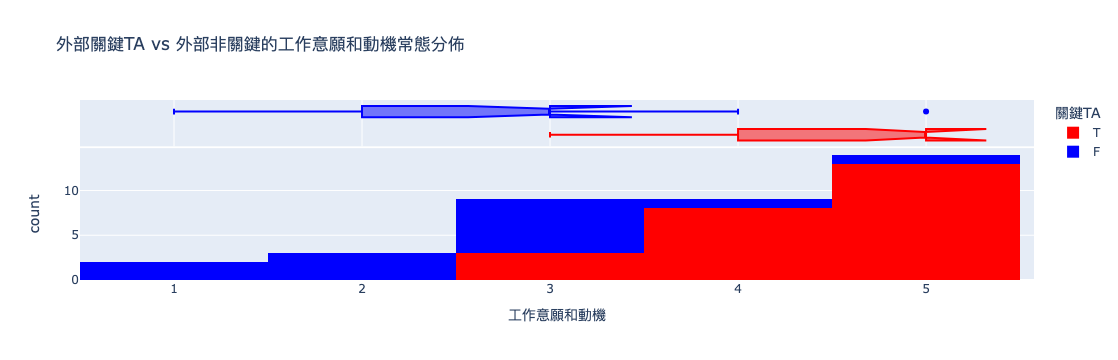

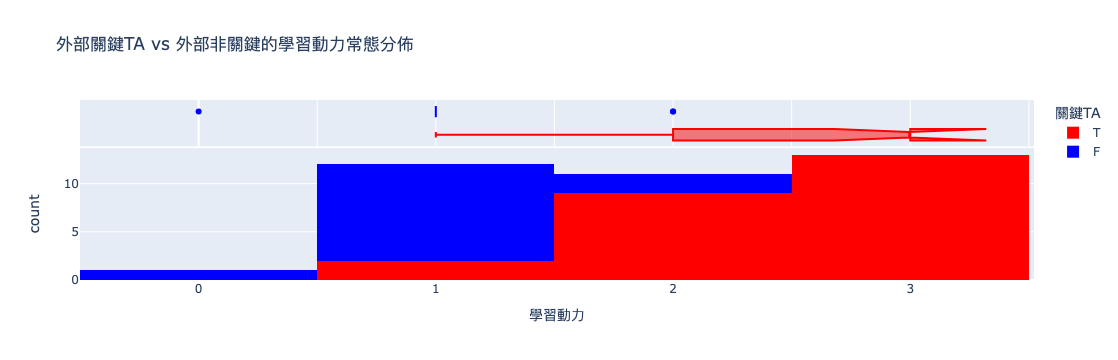

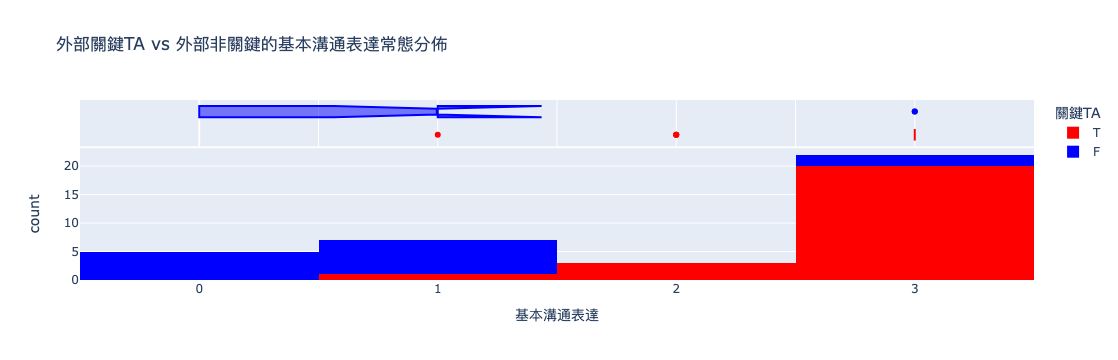

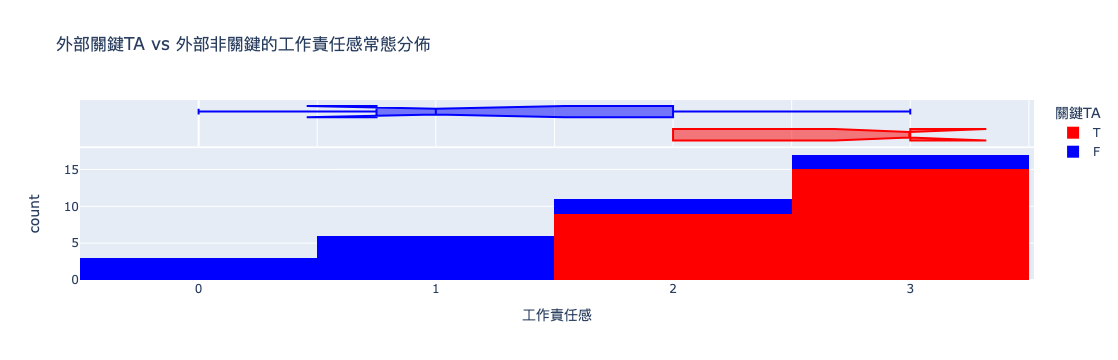

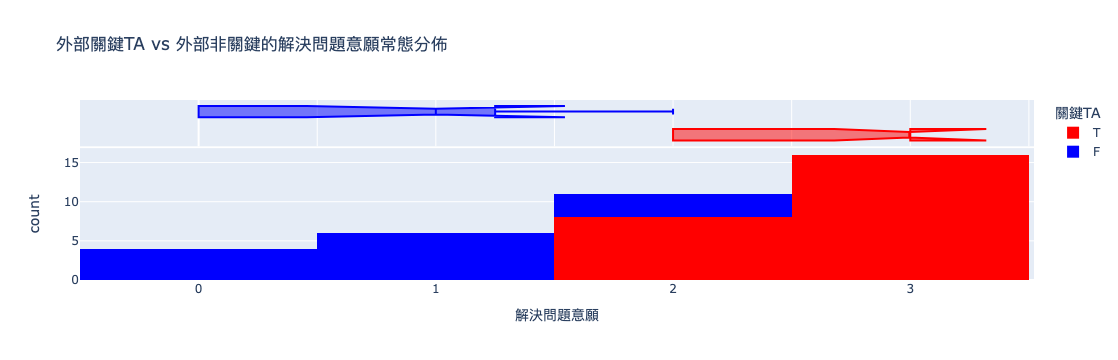

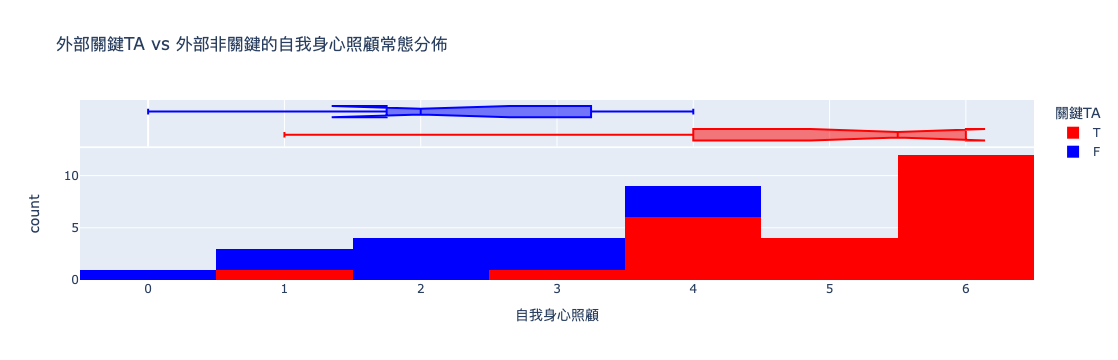

In [47]:
import plotly.express as px
radar_features = ['工作意願和動機', '學習動力', '基本溝通表達', '工作責任感', '解決問題意願', '自我身心照顧']
def generate_distribution(df):
    dist_df = df.copy()
    dist_df[['關鍵TA']] = ta_encoder.inverse_transform(dist_df[['關鍵TA']])
    for feature in radar_features:
        num_bins = int(dist_df[feature].max() - dist_df[feature].min() + 1)
    
        fig = px.histogram(dist_df, x=feature, marginal="box", 
                           title=f'外部關鍵TA vs 外部非關鍵的{feature}常態分佈',
                           nbins=num_bins, color="關鍵TA",color_discrete_sequence=['red','blue'])
    
        # Update x-axis to show integer ticks
        fig.update_layout(
            xaxis=dict(
                tickmode='linear',
                tick0=dist_df[feature].min(),
                dtick=1
            )
        )
        
        fig.show()
generate_distribution(scores_df)

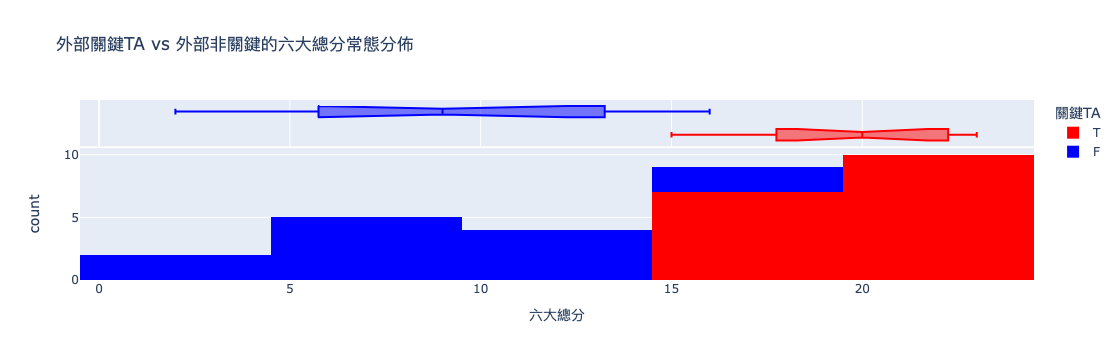

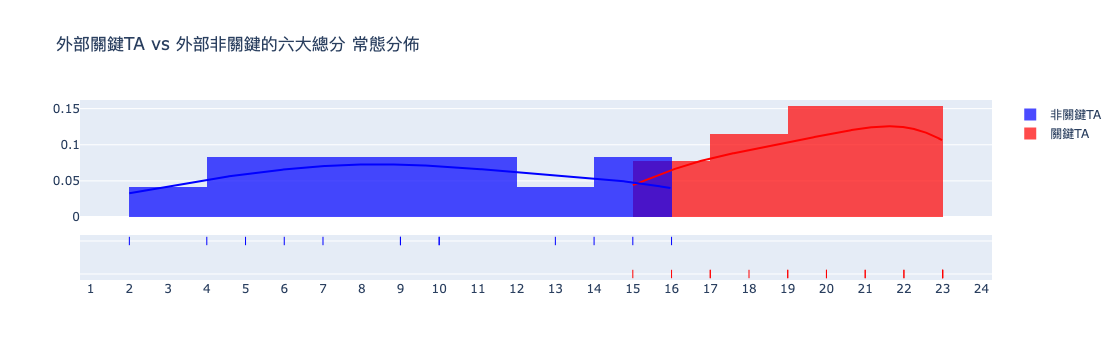

In [50]:
import plotly.figure_factory as ff

MAX_VALUES = {'工作意願和動機': 5,
              '學習動力': 3,
              '基本溝通表達': 3,
              '工作責任感': 3,
              '解決問題意願': 3,
              '社群和社交活動': 3,
              '家人支持程度': 5,
              '私人企業工作經驗': 1,
              '量化求職考量': 3,  
              '先天後天': 1,
              '自我身心照顧': 6}

def generate_total_distribution(df):
    # normalization
    # for feature, max_score in MAX_VALUES.items():
    #     if feature in df.columns:
    #         df[feature + ' (標準化)'] = df[feature] / max_score
    # df['六大總分 (標準化)'] = df[[f + ' (標準化)' for f in features]].sum(axis=1)
    # df[['關鍵TA']] = ta_encoder.inverse_transform(df[['關鍵TA']])
    
    features = ['工作意願和動機', '學習動力', '基本溝通表達', '工作責任感', '解決問題意願', '自我身心照顧']
    feature = '六大總分'
    df[feature] = df[[f for f in features]].sum(axis=1)
    fig = px.histogram(df, x='六大總分', marginal="box", 
                       title=f'外部關鍵TA vs 外部非關鍵的六大總分常態分佈',
                       color="關鍵TA",
                       color_discrete_sequence=['red','blue'])
    ta_list = df[df['關鍵TA']=='T'][feature].dropna().values.tolist()
    nonta_list = df[df['關鍵TA']=='F'][feature].dropna().values.tolist()

    hist_data = [ta_list, nonta_list]
    fig.show()
    fig = ff.create_distplot(hist_data, ['關鍵TA', '非關鍵TA'], bin_size=2, colors = ['red', 'blue'])
    fig.update_layout(
        title_text=f"外部關鍵TA vs 外部非關鍵的{feature} 常態分佈",
        xaxis=dict(
            tickmode='linear',
            tick0=df[feature].min(),
            dtick=1
        )
    )
    fig.show()
generate_total_distribution(outside_df)


## 建模
會利用 `logistic regression` 和 `support vector machine` 來建模並比較兩種建模的準確度

### Features
外在特質: `['社群和社交活動', '家人支持程度', '私人企業工作經驗', '量化求職考量','先天後天', '自我身心照顧']`

內用特質: `['工作意願和動機', '學習動力','基本溝通表達', '工作責任感', '解決問題意願']`

PPSS特質: `['PPSS積極性', 'PPSS責任性', 'PPSS成熟性', 'PPSS務實性', 'PPSS社交性','PPSS合群性', 'PPSS創意性', 'PPSS表達性', 'PPSS學習性', 'PPSS細心', 'PPSS耐心', 'PPSS親和性', 'PPSS領導性', 'PPSS邏輯性']`
 
* **模型一**: 內在特質 logistic regression
* **模型二**: 外在特質 logistic regression
* **模型三**: 內+外在特質 logistic regression
* **模型四**: PPSS logistic regression
* **模型五**: 內在特質 SVM
* **模型六**: 外在特質 SVM
* **模型七**: 內 + 外在特質 SVM
* **模型八**: PPSS SVM

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def svm_model(df, features, target='關鍵TA', test_size=0.2, random_state=42):
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=test_size, random_state=random_state)
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')

    classifier = SVC(kernel='rbf', random_state=random_state)
    classifier.fit(X_train, y_train)

    def _plot_confusion_matrix(y_test, y_test_pred):
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
    
    # Train the classifier using only the outside_features from the training set
    classifier.fit(X_train[features], y_train)
    
    # Predict the target for the test set
    y_pred = classifier.predict(X_test[features])
    
    # Calculate the accuracy and other performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred)
    _plot_confusion_matrix(y_test, y_pred)
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Classification Report:{classification_rep}")
    return classifier

def logistic_regression_model(df, features, target='關鍵TA', test_size=0.2, random_state=42):
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    def _plot_confusion_matrix(y_test, y_test_pred):
        cm = confusion_matrix(y_test, y_test_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    # Evaluation
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred)
    _plot_confusion_matrix(y_test, y_test_pred)
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print(f"Classification Report:{classification_rep}")
    return classifier


用29位訓練，8位盲測


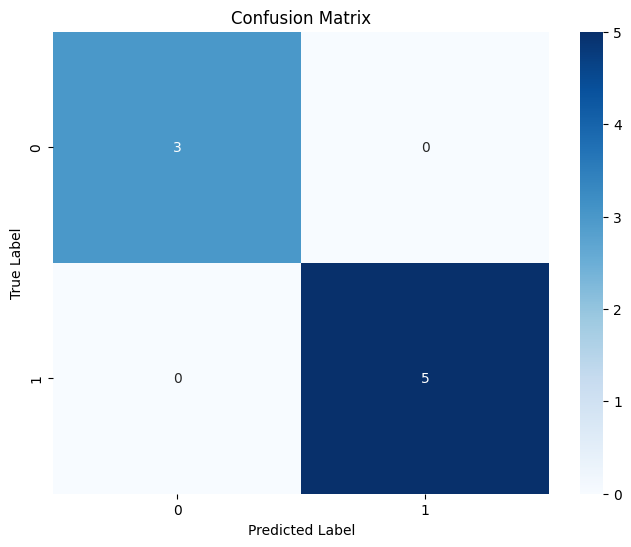

Training Accuracy: 0.9655172413793104
Testing Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

用29位訓練，8位盲測


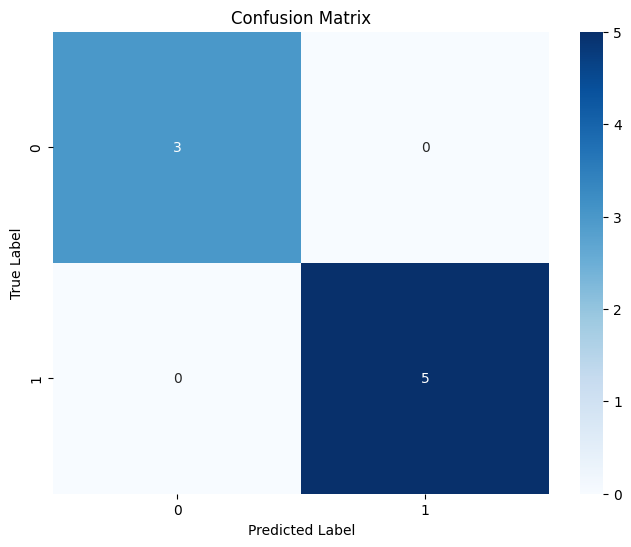

Training Accuracy: 0.9655172413793104
Testing Accuracy: 1.0
Classification Report:              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [6]:
svm = svm_model(scores_df, inside_features)
lrm = logistic_regression_model(scores_df, inside_features)

# Bootstrapping

In [7]:
# Load the dataset
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
@ignore_warnings(category=ConvergenceWarning)
def logistic_regression_bootstrap(df,features,target='關鍵TA', test_size=0.2, random_state=42, n_bootstraps=100, title= "Bootstrapped"):
    # df = scores_df.copy()    
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=test_size, random_state=random_state)
    
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = classifier.predict(X_test)

    bootstrap_accuracies = []
    # bootstrapping 
    for _ in range(n_bootstraps):
        # TODO: wrap try catch here in case we get all TA's
        X_train_boot, y_train_boot = resample(X_train, y_train)
        classifier.fit(X_train_boot, y_train_boot)
        # Predict on the original testing data
        y_test_pred_boot = classifier.predict(X_test)
        bootstrap_accuracies.append(accuracy_score(y_test, y_test_pred_boot))
    bootstrap_accuracies = np.array(bootstrap_accuracies)
    mean_accuracy = bootstrap_accuracies.mean()
    std_dev_accuracy = bootstrap_accuracies.std()
    
    # Plot the distribution of accuracies
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')
    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_accuracies, kde=True)
    plt.title(title)
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.axvline(x=mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.legend()
    plt.show()
    return lrm, bootstrap_accuracies

def svm_bootstrap(df,features,target='關鍵TA', test_size=0.2, random_state=42, n_bootstraps=100, title= 'Bootstrapped Accuracies Distribution'):
    # df = scores_df.copy()    
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=test_size, random_state=random_state)
    
    classifier = SVC(kernel='rbf', random_state=random_state)
    classifier.fit(X_train, y_train)

    # Predict on the testing data
    y_test_pred = classifier.predict(X_test)

    bootstrap_accuracies = []
    # bootstrapping 
    for _ in range(n_bootstraps):
        # TODO: wrap try catch here in case we get all TA's
        X_train_boot, y_train_boot = resample(X_train, y_train)
        classifier.fit(X_train_boot, y_train_boot)
        # Predict on the original testing data
        y_test_pred_boot = classifier.predict(X_test)
        bootstrap_accuracies.append(accuracy_score(y_test, y_test_pred_boot))
    bootstrap_accuracies = np.array(bootstrap_accuracies)
    mean_accuracy = bootstrap_accuracies.mean()
    std_dev_accuracy = bootstrap_accuracies.std()
    
    # Plot the distribution of accuracies
    len_training = len(X_train)
    len_testing = len(X_test)
    print(f'用{len_training}位訓練，{len_testing}位盲測')
    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_accuracies, kde=True)
    plt.title(title)
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.axvline(x=mean_accuracy, color='red', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.legend()
    plt.show()
    return classifier, bootstrap_accuracies

用29位訓練，8位盲測


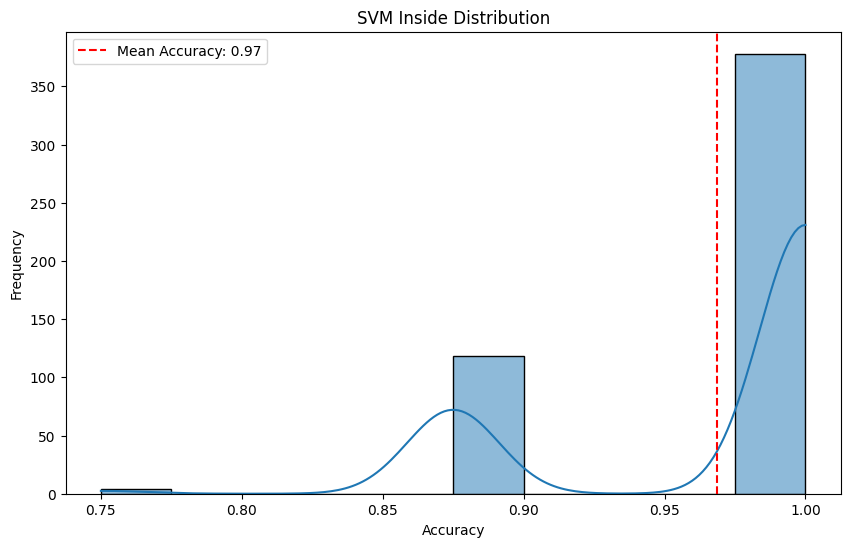

用29位訓練，8位盲測


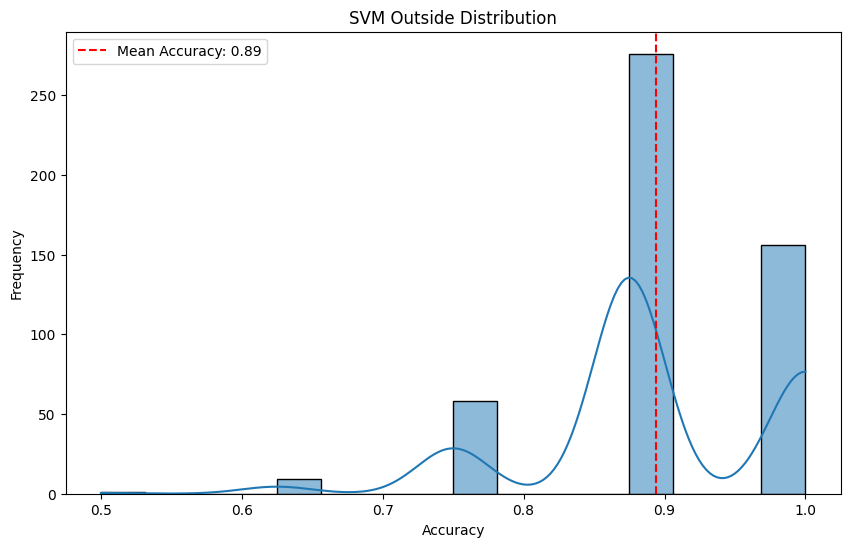

用29位訓練，8位盲測


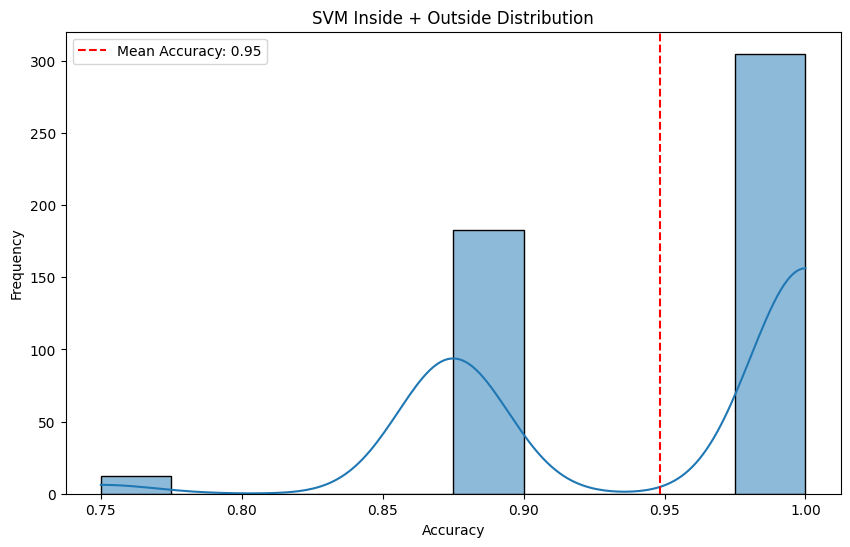

In [8]:
svm, bootstrap_accuracies  = svm_bootstrap(scores_df,  inside_features , n_bootstraps=500, title= 'SVM Inside Distribution')
svm, bootstrap_accuracies  = svm_bootstrap(scores_df, outside_features, n_bootstraps=500, title= 'SVM Outside Distribution')
svm, bootstrap_accuracies  = svm_bootstrap(scores_df, inside_features + outside_features, n_bootstraps=500, title= 'SVM Inside + Outside Distribution')

用29位訓練，8位盲測


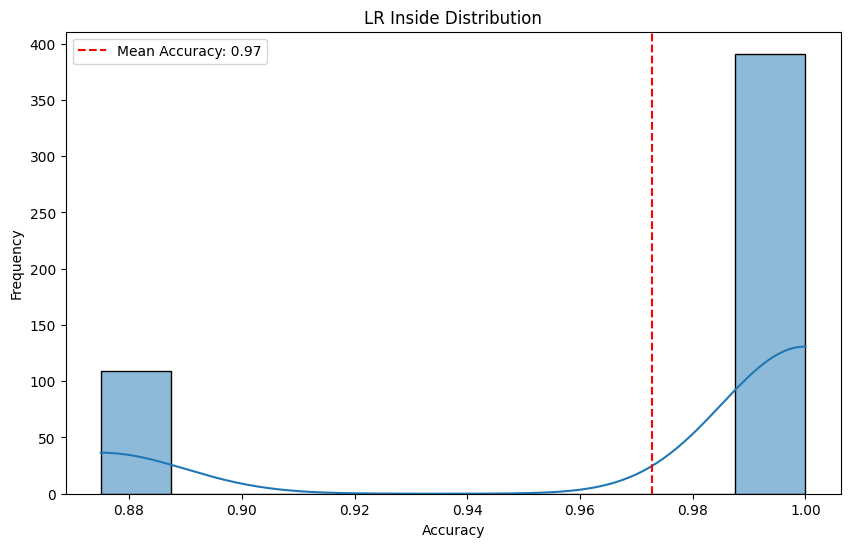

用29位訓練，8位盲測


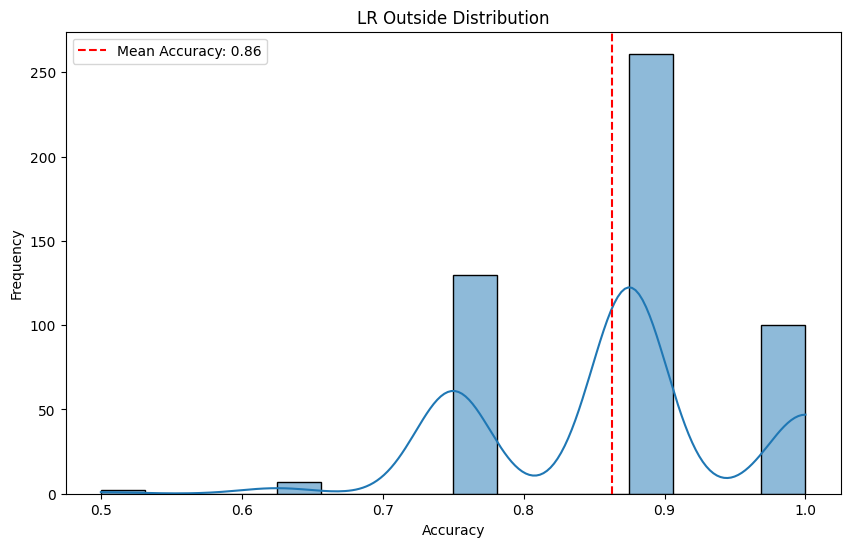

用29位訓練，8位盲測


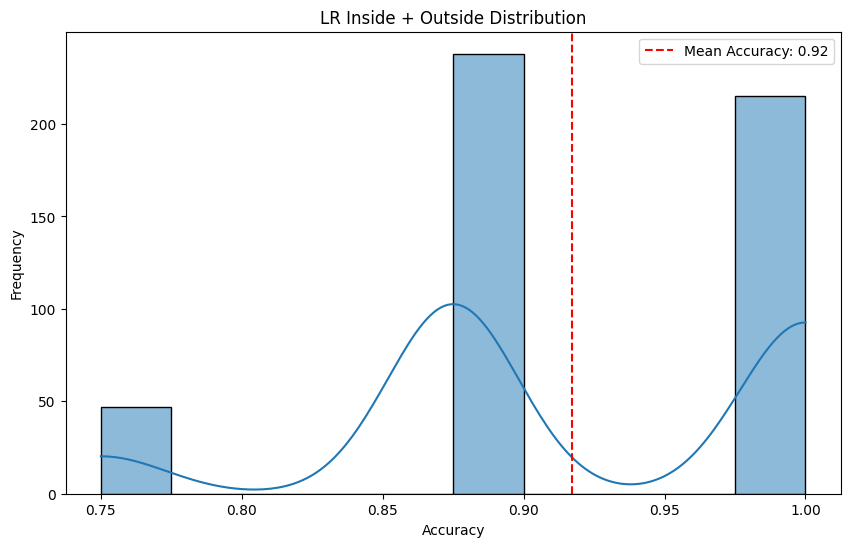

In [9]:
# Find the lowest accuracy achieved in the bootstrapping process
lrm1, bootstrap_accuracies  = logistic_regression_bootstrap(scores_df, inside_features, n_bootstraps=500, title = "LR Inside Distribution")
lrm2, bootstrap_accuracies  = logistic_regression_bootstrap(scores_df, outside_features, n_bootstraps=500, title= "LR Outside Distribution")
lrm3, bootstrap_accuracies  = logistic_regression_bootstrap(scores_df, inside_features + outside_features, n_bootstraps=500, title= 'LR Inside + Outside Distribution')

關鍵TA: 24 位 
非關鍵TA: 13 位
用29位訓練，8位盲測


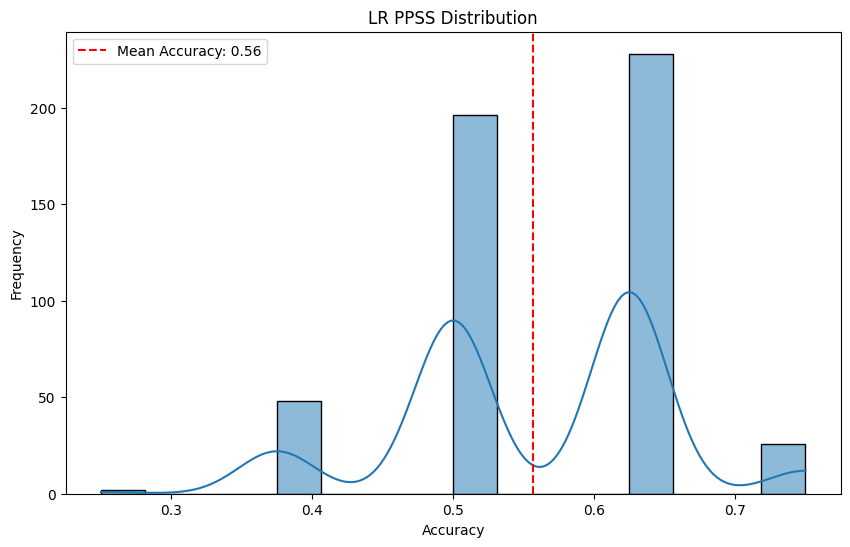

用29位訓練，8位盲測


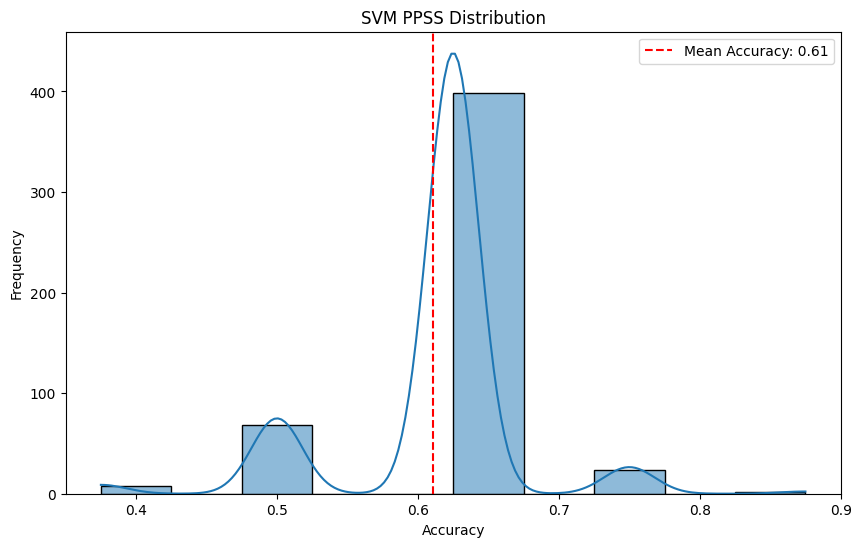

In [10]:
# ppss_features = ['PPSS積極性','PPSS責任性','PPSS成熟性','PPSS務實性','PPSS社交性','PPSS合群性','PPSS創意性','PPSS表達性','PPSS學習性','PPSS細心','PPSS耐心','PPSS親和性','PPSS領導性','PPSS邏輯性']
ppss_features = ['PPSS責任性', 'PPSS表達性','PPSS學習性']
ppss_scores_df, ppss_ta_df, ppss_nonta_df = read_data(FILE_PATH, ppss=True)
lrm, bootstrap_accuracies  = logistic_regression_bootstrap(ppss_scores_df, ppss_features, n_bootstraps=500, title = "LR PPSS Distribution")
svm, bootstrap_accuracies = svm_bootstrap(ppss_scores_df, ppss_features, n_bootstraps=500, title = "SVM PPSS Distribution")

In [11]:
from plotly.graph_objs import Margin
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import math
inside_features = ['工作意願和動機', '學習動力', '基本溝通表達', '工作責任感', '解決問題意願']
outside_features = ['自我身心照顧', '社群和社交活動', '家人支持程度','私人企業工作經驗','量化求職考量','先天後天']
ppss_features = ['PPSS積極性','PPSS責任性','PPSS成熟性','PPSS務實性','PPSS社交性','PPSS合群性','PPSS創意性','PPSS表達性','PPSS學習性','PPSS細心','PPSS耐心','PPSS親和性','PPSS領導性','PPSS邏輯性']
key_ppss_features = ['PPSS表達性','PPSS責任性','PPSS學習性']

MAX_VALUES = {'工作意願和動機': 5,
              '學習動力': 3,
              '基本溝通表達': 3,
              '工作責任感': 3,
              '解決問題意願': 3,
              '社群和社交活動': 3,
              '家人支持程度': 5,
              '私人企業工作經驗': 1,
              '量化求職考量': 3,  
              '先天後天': 1,
              '自我身心照顧': 6}

def generate_radar_charts(df,features,charts_per_row, vertical_spacing = 0.10, horizontal_spacing = 0.20):
    n_rows =  math.ceil(len(df) / charts_per_row)
    # Create a subplot layout
    fig = make_subplots(rows=n_rows,
                        cols=charts_per_row,
                        specs=[[{'type': 'polar'}]*charts_per_row]*n_rows,
                        vertical_spacing = vertical_spacing,
                        horizontal_spacing = horizontal_spacing,
                        subplot_titles=(df.受訪者)
                        )

    layout_update = {}
    features_closed = features[0:] + [features[0]]

    for index, row in df.iterrows():
        row_normalized = {col: row[col] / MAX_VALUES[col] for col in features[0:]}
        row_normalized_list = list(row_normalized.values()) + [list(row_normalized.values())[0]]

        subplot_row = index // charts_per_row + 1
        subplot_col = index % charts_per_row + 1
        polar_name = f'polar{index+1}'
        layout_update[polar_name] = dict(radialaxis=dict(showticklabels=False))

        fig.add_trace(
            go.Scatterpolar(
              name=row.受訪者,
              r=row_normalized_list,
              theta=features_closed,
              fill='toself',
              showlegend=False,
          ), row=subplot_row, col=subplot_col)


    # Update layout to remove radial tick labels and adjust layout
    fig.update_layout(
        **layout_update,
        margin=dict(t=50,b=50, l=100, r=100),
        height=1000,
    )
    fig.update_polars(radialaxis=dict(range=[0, 1]))
    fig.show()    

### 關鍵TA雷達圖 (內部 vs. 外部)

In [12]:
# radar_features = outside_features[0:4] + outside_features[-1:]
# Todo: separate inside and outside
# todo: generate average together
radar_features = inside_features + outside_features[0:1]
radar_ta_df = ta_df.copy()
def get_avg_df(df, ta=True):
    key = "平均關鍵TA" if ta else "平均非關鍵TA"
    bool = "T" if ta else "F"
    avg_inside_features = df[inside_features].mean()
    avg_outside_features = df[outside_features].mean()
    avg_ta = pd.Series([key] + [None]*(len(meta_features)-1) +
                       avg_inside_features.tolist() + 
                       avg_outside_features.tolist() + [key], 
                       index=['受訪者'] + meta_features[1:] + inside_features + outside_features + [target])
    return avg_ta.to_frame().transpose()

def get_median_df(df, ta=True, outside=False):
    key = "關鍵TA中間值" if ta else "非關鍵TA中間值"
    key = "外部" + key if outside else "內部" + key
    bool = "T" if ta else "F"
    avg_inside_features = df[inside_features].median()
    avg_outside_features = df[outside_features].median()
    avg_ta = pd.Series([key] + [None]*(len(meta_features)-1) +
                       avg_inside_features.tolist() + 
                       avg_outside_features.tolist() + [key], 
                       index=['受訪者'] + meta_features[1:] + inside_features + outside_features + [target])
    return avg_ta.to_frame().transpose()
# radar_ta_df = pd.concat([radar_ta_df, get_avg_df(ta_df)], axis=0, ignore_index = True)
# generate_radar_charts(radar_ta_df, radar_features, charts_per_row=4)
# radar_ta_df[-1:][radar_features]

# avg_ta = get_avg_df(ta_df)
# avg_nonta = get_avg_df(nonta_df, ta=False)
# radar_compare_df = pd.concat([avg_ta, avg_nonta], axis =0, ignore_index=True)
# generate_radar_charts(radar_compare_df, radar_features, charts_per_row=2)

內部關鍵TA雷達圖


/var/folders/j4/0dksbf290y36vdhq92r7r06r0000gn/T/ipykernel_16195/599508920.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



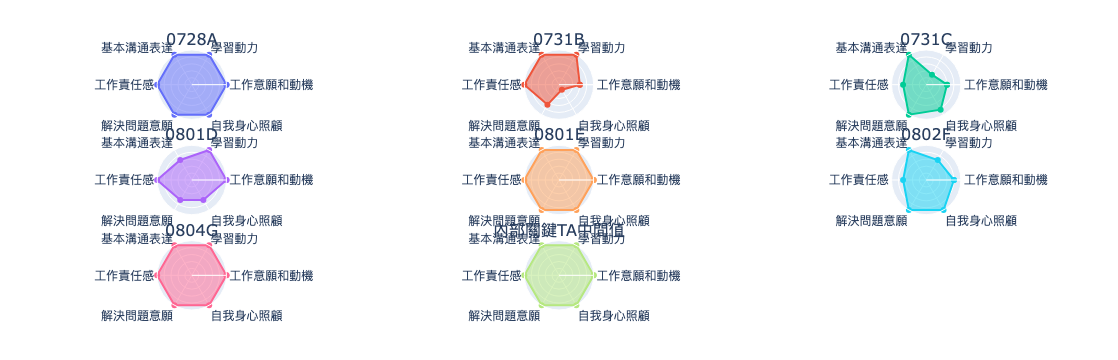

,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,自我身心照顧
0,5.0,3.0,3.0,3.0,3.0,6.0


In [13]:
print("內部關鍵TA雷達圖")
radar_features = inside_features + outside_features[0:1]
MAX_VALUES = {'工作意願和動機': 5,
              '學習動力': 3,
              '基本溝通表達': 3,
              '工作責任感': 3,
              '解決問題意願': 3,
              '社群和社交活動': 3,
              '家人支持程度': 5,
              '私人企業工作經驗': 1,
              '量化求職考量': 3,  
              '先天後天': 1,
              '自我身心照顧': 6}
radar_df = inside_ta_df.copy()
inside_ta_median = get_median_df(radar_df, ta=True)
radar_df = pd.concat([radar_df, inside_ta_median], axis=0, ignore_index= True)
generate_radar_charts(radar_df, radar_features, charts_per_row=3)
inside_ta_median[radar_features]

外部關鍵TA雷達圖


/var/folders/j4/0dksbf290y36vdhq92r7r06r0000gn/T/ipykernel_16195/3662965186.py:4: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



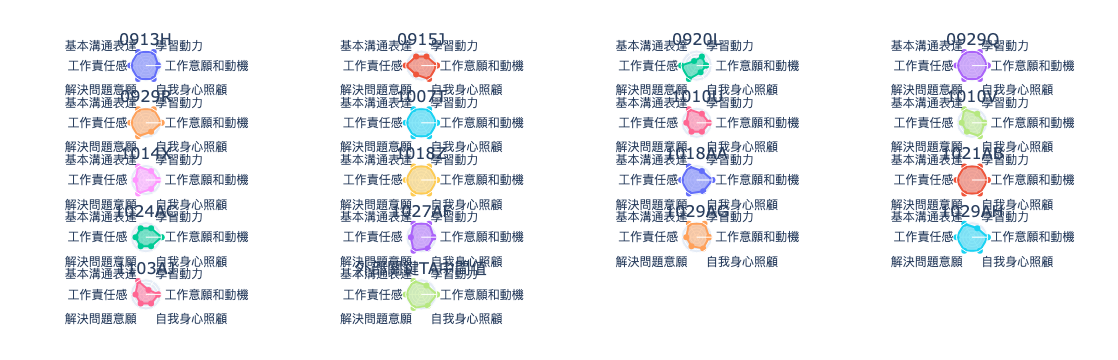

,受訪者,內外部,障別,問卷求職管道,問卷學歷,經歷,求職考量,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,自我身心照顧,社群和社交活動,家人支持程度,私人企業工作經驗,量化求職考量,先天後天,關鍵TA
0,外部關鍵TA中間值,None,None,None,None,None,None,5.0,2.0,3.0,3.0,3.0,5.0,2.0,2.0,1.0,3.0,1.0,外部關鍵TA中間值


In [14]:
print("外部關鍵TA雷達圖")
radar_df = outside_ta_df.copy()
median_outside_ta = get_median_df(outside_ta_df, ta=True, outside=True)
radar_df = pd.concat([radar_df, median_outside_ta], axis=0, ignore_index= True)
generate_radar_charts(radar_df, radar_features, charts_per_row=4)
median_outside_ta

內部中間值 vs. 外部中間值


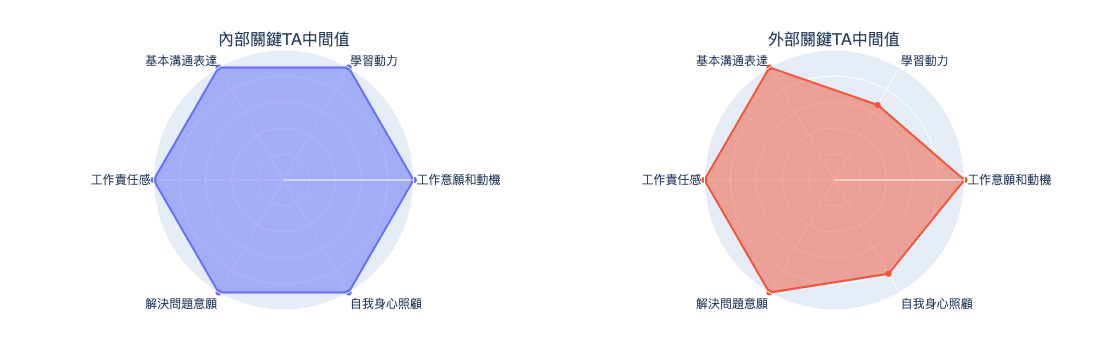

In [15]:
print("內部中間值 vs. 外部中間值") 
radar_df = pd.concat([get_median_df(inside_ta_df, ta=True), get_median_df(outside_ta_df, ta=True, outside=True)], axis=0, ignore_index= True)
generate_radar_charts(radar_df, radar_features, charts_per_row=2)

# 非關鍵TA雷達圖

/var/folders/j4/0dksbf290y36vdhq92r7r06r0000gn/T/ipykernel_16195/2891760804.py:2: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



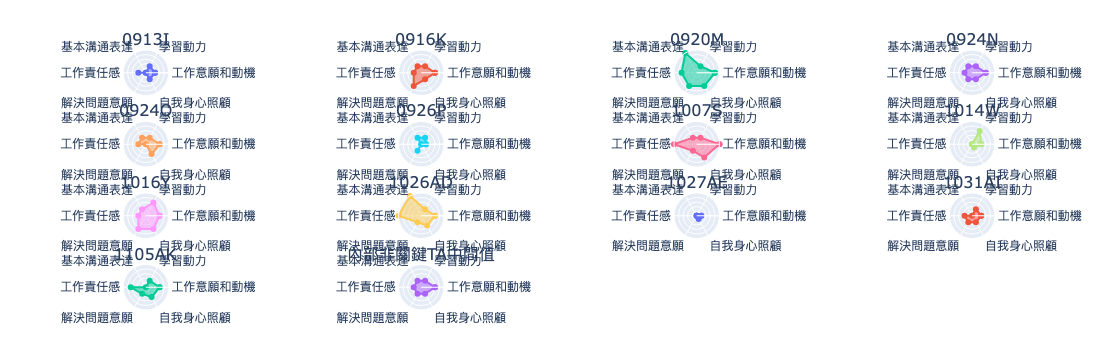

,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,自我身心照顧
13,3.0,1.0,1.0,1.0,1.0,2.0


In [16]:
radar_nonta_df = nonta_df.copy()
radar_nonta_df = pd.concat([radar_nonta_df, get_median_df(nonta_df, ta=False)], axis=0, ignore_index = True)
generate_radar_charts(radar_nonta_df, radar_features, charts_per_row = 4)
radar_nonta_df[-1:][radar_features]

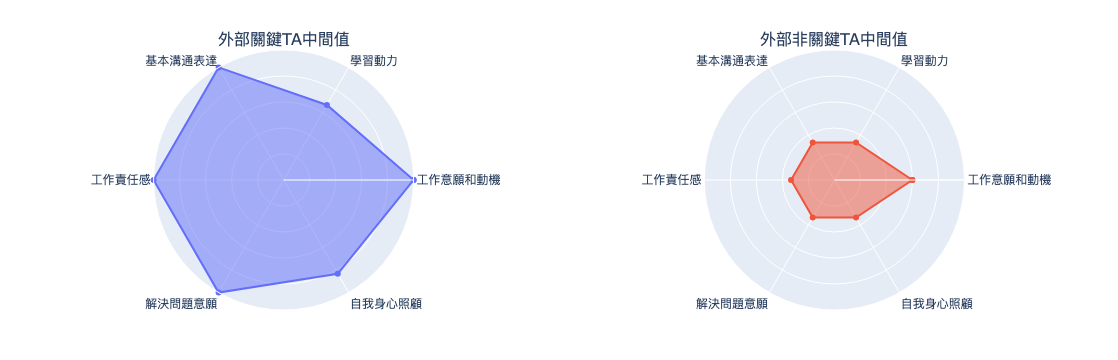

,受訪者,內外部,障別,問卷求職管道,問卷學歷,經歷,求職考量,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,自我身心照顧,社群和社交活動,家人支持程度,私人企業工作經驗,量化求職考量,先天後天,關鍵TA
0,外部關鍵TA中間值,None,None,None,None,None,None,5.0,2.0,3.0,3.0,3.0,5.0,2.0,2.0,1.0,3.0,1.0,外部關鍵TA中間值


In [17]:
import plotly.graph_objects as go
radar_charts= pd.concat([get_median_df(outside_ta_df, ta=True, outside=True),get_median_df(nonta_df, ta=False, outside=True)], axis =0, ignore_index=True)
generate_radar_charts(radar_charts, radar_features, charts_per_row=2)
foo = get_median_df(outside_ta_df, ta=True, outside=True)
foo

## 關鍵TA相關矩陣

In [54]:
corr_features = inside_features + outside_features + ['問卷學歷'] + ['自我身心照顧']
pearson_corr_mx = scores_df[corr_features].corr()
spearman_corr_mx = scores_df[corr_features].corr(method='spearman')
kendall_corr_mx = scores_df[corr_features].corr(method = 'kendall')
spearman_corr_mx

,工作意願和動機,學習動力,基本溝通表達,工作責任感,解決問題意願,自我身心照顧,社群和社交活動,家人支持程度,私人企業工作經驗,量化求職考量,先天後天,問卷學歷,自我身心照顧
工作意願和動機,1.000000,0.649367,0.600084,0.775493,0.651624,0.792379,0.322014,0.436233,0.256112,0.509832,-0.140561,0.448858,0.792379
學習動力,0.649367,1.000000,0.592196,0.642722,0.691979,0.629594,0.183177,0.417604,0.107905,0.514991,-0.045589,0.395662,0.629594
基本溝通表達,0.600084,0.592196,1.000000,0.604120,0.748924,0.703666,0.239306,0.425390,0.254461,0.681573,-0.183971,0.141593,0.703666
工作責任感,0.775493,0.642722,0.604120,1.000000,0.652193,0.633804,0.317946,0.485902,0.073843,0.391414,-0.076127,0.461829,0.633804
解決問題意願,0.651624,0.691979,0.748924,0.652193,1.000000,0.760655,0.329382,0.527620,0.233155,0.617514,-0.070073,0.355099,0.760655
自我身心照顧,0.792379,0.629594,0.703666,0.633804,0.760655,1.000000,0.418119,0.431449,0.102340,0.553502,-0.044346,0.279623,1.000000
社群和社交活動,0.322014,0.183177,0.239306,0.317946,0.329382,0.418119,1.000000,0.189786,-0.076217,0.304990,-0.086591,-0.090230,0.418119
家人支持程度,0.436233,0.417604,0.425390,0.485902,0.527620,0.431449,0.189786,1.000000,0.151620,0.183519,0.010395,0.313157,0.431449
私人企業工作經驗,0.256112,0.107905,0.254461,0.073843,0.233155,0.102340,-0.076217,0.151620,1.000000,0.273941,-0.180477,-0.022550,0.102340
量化求職考量,0.509832,0.514991,0.681573,0.391414,0.617514,0.553502,0.304990,0.183519,0.273941,1.000000,-0.149779,0.278167,0.553502


0.2 − 0.39 is a weak correlation. 0.4 − 0.59 is a moderate correlation. 0.6 − 0.79 is a strong correlation.


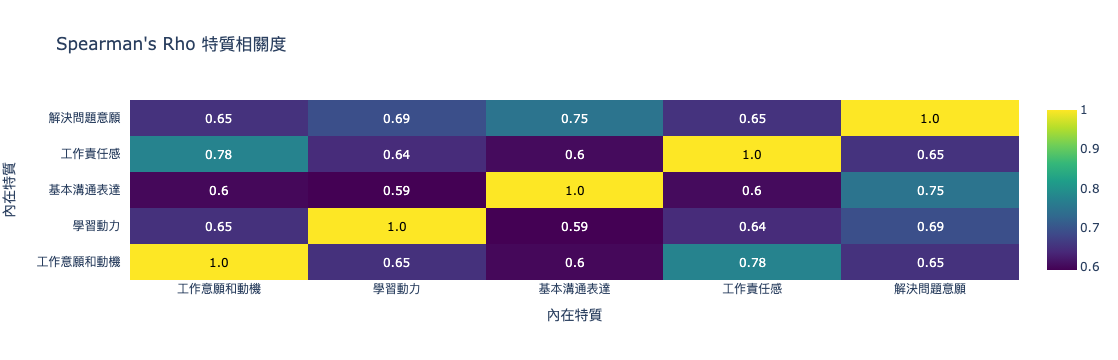

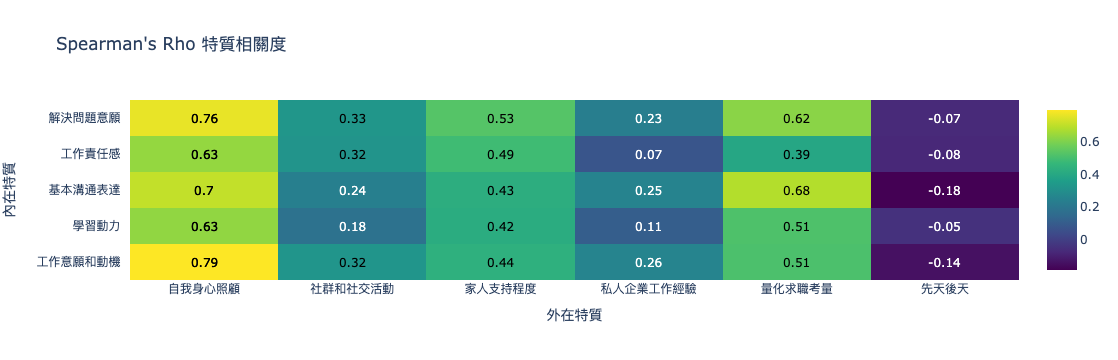

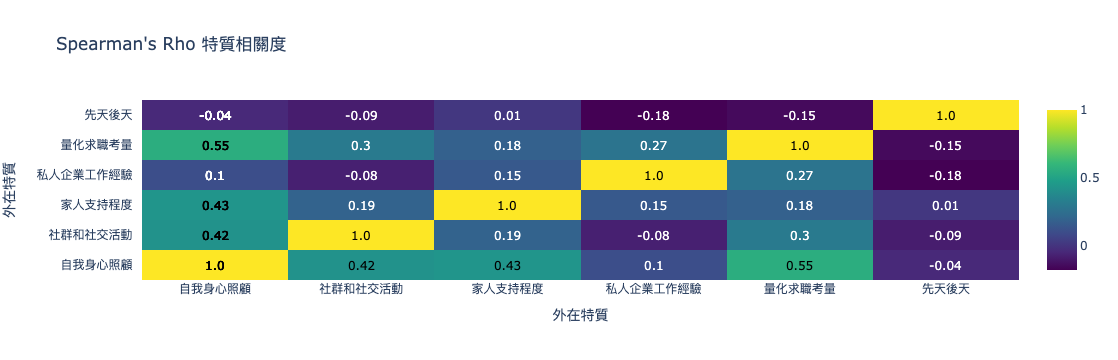

In [60]:
import plotly.figure_factory as ff

def plot_corr_mx(corr_mx, title= '特質相關度', xaxis='外在特質', yaxis ='內在特質'):
  fig = ff.create_annotated_heatmap(
      z=corr_mx.values,
      x=list(corr_mx.columns),
      y=list(corr_mx.index),
      annotation_text=corr_mx.round(2).values,
      colorscale='Viridis',
      showscale=True,
      hoverinfo='z'
  )
  fig.update_layout(
      title=title,
      xaxis=dict(title=xaxis, side='bottom'),
      yaxis=dict(title=yaxis),
  )
  fig.show()
print("0.2 − 0.39 is a weak correlation. 0.4 − 0.59 is a moderate correlation. 0.6 − 0.79 is a strong correlation.")
plot_corr_mx(spearman_corr_mx[0:5][inside_features], title = "Spearman's Rho 特質相關度", xaxis='內在特質')
plot_corr_mx(spearman_corr_mx[0:5][outside_features], title ="Spearman's Rho 特質相關度", xaxis = '外在特質')
plot_corr_mx(spearman_corr_mx[5:11][outside_features + ['自我身心照顧']], title ="Spearman's Rho 特質相關度", yaxis = '外在特質')

## 障別分析

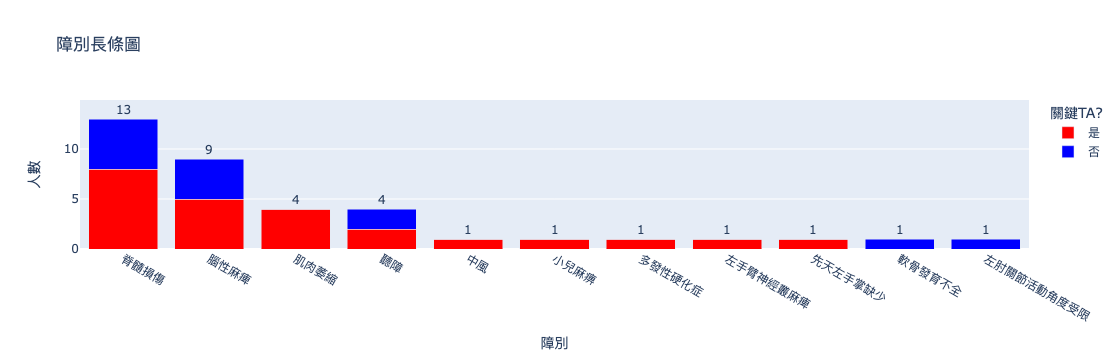

In [38]:
import plotly.express as px
def generate_dis_dist():
    key_ta_df = ta_df.copy()
    nonkey_ta_df = nonta_df.copy()
    
    key_ta_experience_distribution = key_ta_df['障別'].value_counts()
    non_key_ta_experience_distribution = nonkey_ta_df['障別'].value_counts()
    
    combined_data = pd.concat([
        key_ta_experience_distribution.rename('是'),
        non_key_ta_experience_distribution.rename('否')
    ], axis=1).fillna(0)

    combined_data['Total'] = (combined_data['是'] + combined_data['否'])
    combined_data['Total'] = combined_data['Total'].astype(int)
    combined_data = combined_data.reset_index().rename(columns={'index': 'Disability Type'})
    combined_data.reset_index(inplace=True)
    combined_data.rename(columns={'index': 'Experience Type'}, inplace=True)
    fig = px.bar(combined_data, 
                 x='障別', 
                 y=['是', '否'],
                 barmode='stack',
                 title='障別長條圖',
                 labels={'value': '人數', 'variable': '關鍵TA?'},
                 color_discrete_sequence=['red','blue'])
    for i, total in enumerate(combined_data['Total']):
        fig.add_annotation(
            x=combined_data['Experience Type'][i], 
            y=total, 
            text=str(total), 
            showarrow=False,
            yshift=10  # Adjust this value to position the annotation above the bar
        )
    fig.show()
generate_dis_dist()

## 問卷學歷
同關鍵TA管道分析


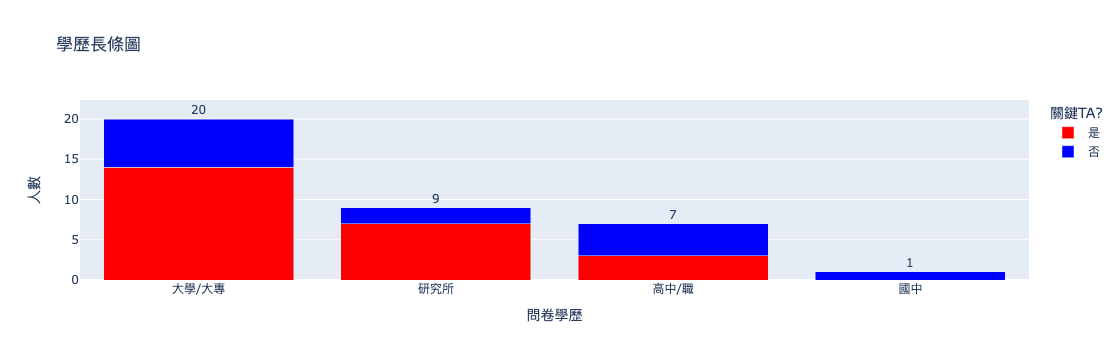

In [37]:
import plotly.express as px
from collections import Counter

def generate_edu_dist():
    key_ta_df = ta_df.copy()
    nonkey_ta_df = nonta_df.copy()
    key_ta_df[['問卷學歷']] = edu_encoder.inverse_transform(key_ta_df[['問卷學歷']])
    nonkey_ta_df[['問卷學歷']] = edu_encoder.inverse_transform(nonkey_ta_df[['問卷學歷']])
    
    key_ta_experience_distribution = key_ta_df['問卷學歷'].str.split('、').explode().value_counts()
    non_key_ta_experience_distribution = nonkey_ta_df['問卷學歷'].str.split('、').explode().value_counts()
    
    combined_data = pd.concat([
        key_ta_experience_distribution.rename('是'),
        non_key_ta_experience_distribution.rename('否')
    ], axis=1).fillna(0)

    combined_data['Total'] = (combined_data['是'] + combined_data['否'])
    combined_data['Total'] = combined_data['Total'].astype(int)
    combined_data = combined_data.reset_index().rename(columns={'index': 'Experience Type'})
    combined_data.reset_index(inplace=True)
    combined_data.rename(columns={'index': 'Experience Type'}, inplace=True)
    fig = px.bar(combined_data, 
                 x='問卷學歷', 
                 y=['是', '否'],
                 barmode='stack',
                 title='學歷長條圖',
                 labels={'value': '人數', 'variable': '關鍵TA?'},
                 color_discrete_sequence = ['red', 'blue'])
    for i, total in enumerate(combined_data['Total']):
        fig.add_annotation(
            x=combined_data['Experience Type'][i], 
            y=total, 
            text=str(total), 
            showarrow=False,
            yshift=10  # Adjust this value to position the annotation above the bar
        )
    fig.show()
generate_edu_dist()

## 經歷長條圖
直接mix(關鍵 & 非關鍵TA)


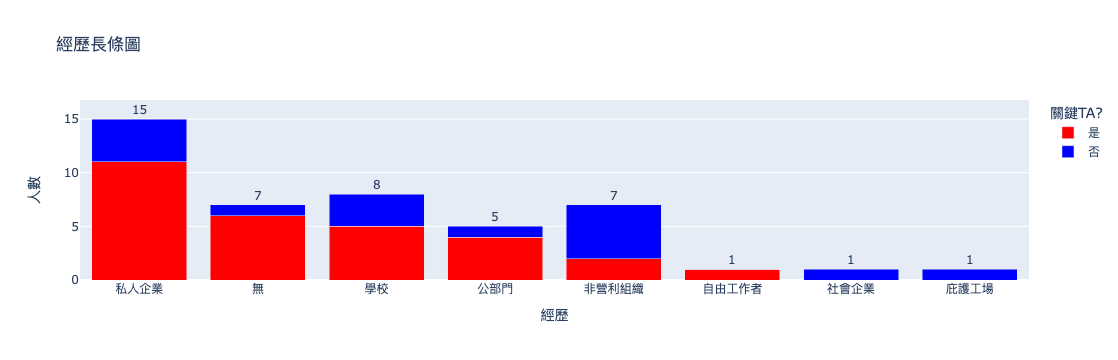

In [36]:
def generate_experience_dist():
    key_ta_df = ta_df.copy()
    non_key_ta_df = nonta_df.copy()
    
    key_ta_experience_distribution = key_ta_df['經歷'].str.split('、').explode().value_counts()
    non_key_ta_experience_distribution = non_key_ta_df['經歷'].str.split('、').explode().value_counts()
    
    combined_data = pd.concat([
        key_ta_experience_distribution.rename('是'),
        non_key_ta_experience_distribution.rename('否')
    ], axis=1).fillna(0)

    combined_data['Total'] = (combined_data['是'] + combined_data['否'])
    combined_data['Total'] = combined_data['Total'].astype(int)
    combined_data = combined_data.reset_index().rename(columns={'index': 'Experience Type'})
    combined_data.reset_index(inplace=True)
    combined_data.rename(columns={'index': 'Experience Type'}, inplace=True)
    fig = px.bar(combined_data, 
                 x='經歷', 
                 y=['是', '否'],
                 barmode='stack',
                 title='經歷長條圖',
                 labels={'value': '人數', 'variable': '關鍵TA?'},
                 color_discrete_sequence=['red','blue'])
    for i, total in enumerate(combined_data['Total']):
        fig.add_annotation(
            x=combined_data['Experience Type'][i], 
            y=total, 
            text=str(total), 
            showarrow=False,
            yshift=10  # Adjust this value to position the annotation above the bar
        )
    fig.show()
generate_experience_dist()

## 求職考量
身障者的三大求職考量
1. 經濟需求
2. 工作性質與內容
3. 無障礙環境

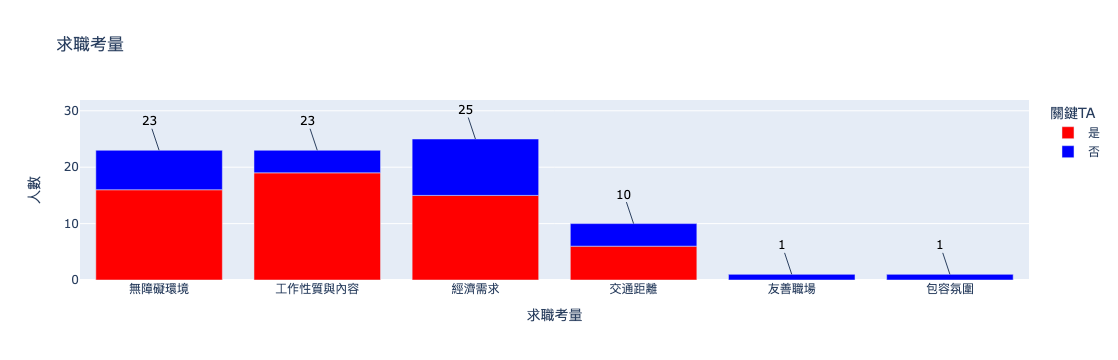

In [35]:
import plotly.express as px
from collections import Counter

def generate_job_consideration_chart(ta_df, nonta_df):
    # Count job considerations for both subsets
    jc_true = ta_df['求職考量'].str.split('、').explode().str.strip()
    jc_false = nonta_df['求職考量'].str.split('、').explode().str.strip()
    jc_counts_true = pd.Series(Counter(jc_true)).reset_index()
    jc_counts_false = pd.Series(Counter(jc_false)).reset_index()
    jc_counts_true.columns = ['求職考量', '人數']
    jc_counts_false.columns = ['求職考量', '人數']
    jc_counts_true['關鍵TA'] = '是'
    jc_counts_false['關鍵TA'] = '否'
    combined_counts_with_key_TA = pd.concat([jc_counts_true, jc_counts_false])
    total_counts = combined_counts_with_key_TA.groupby('求職考量')['人數'].sum().reset_index()
    fig = px.bar(combined_counts_with_key_TA, x='求職考量', y='人數', color='關鍵TA',
                 title='求職考量',
                 labels={'人數': '人數', '求職考量': '求職考量', '關鍵TA': '關鍵TA'},
                 color_discrete_sequence=['red','blue'])
    
    # Add text annotations for total counts
    for i, row in total_counts.iterrows():
        fig.add_annotation(
            x=row['求職考量'],
            y=row['人數'],
            text=str(row['人數']),
            showarrow=True,
            font=dict(
                size=12,
                color="black"
            )
        )
    fig.show()

generate_job_consideration_chart(ta_df, nonta_df)

## 關鍵TA管道分析

In [24]:
from collections import Counter
import matplotlib.pyplot as plt
import plotly.express as px

def get_job_channel(df):
  # Initialize a Counter to keep track of the frequencies of each unique item
  item_counter = Counter()

  # Go through each row in the "問卷求職管道" column, split the items by "、", and update the counter
  for entry in df["問卷求職管道"]:
      items = entry.split("、")
      item_counter.update(items)

  # Convert the counter to a dictionary and sort it by value in descending order
  item_dict = dict(sorted(item_counter.items(), key=lambda x: x[1], reverse=True))
  return item_dict
# total_dict = get_job_channel(scores_df)
# fig = px.pie(names=total_dict.keys(), values=total_dict.values(), title='全部問卷求職管道')
# fig.update_traces(textinfo='percent+value')
# fig.show()

# ta_dict = get_job_channel(ta_df)
# fig = px.pie(names=ta_dict.keys(), values=ta_dict.values(), title='TA問卷求職管道')
# fig.update_traces(textinfo='percent+value')
# fig.show()

# nonta_dict = get_job_channel(nonta_df)
# fig = px.pie(names=nonta_dict.keys(), values=nonta_dict.values(), title='非TA問卷求職管道')
# fig.update_traces(textinfo='percent+value')
# fig.show()

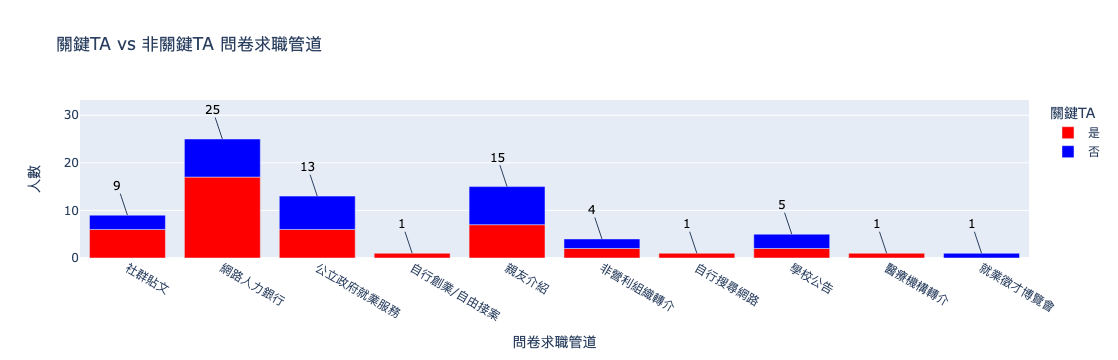

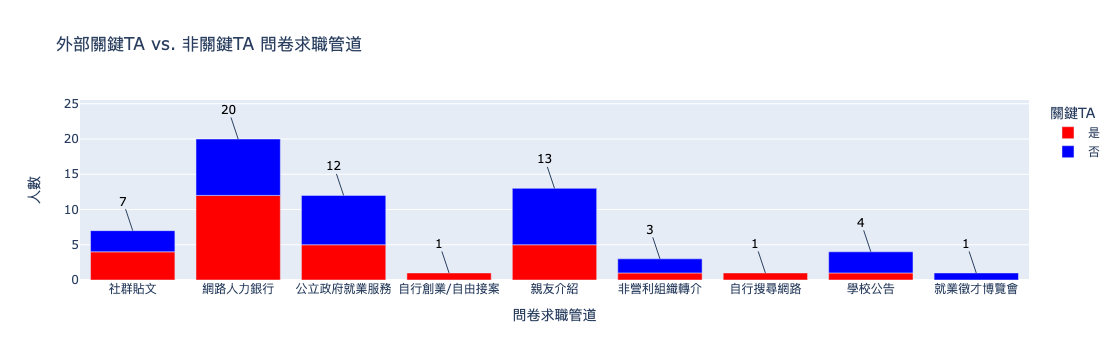

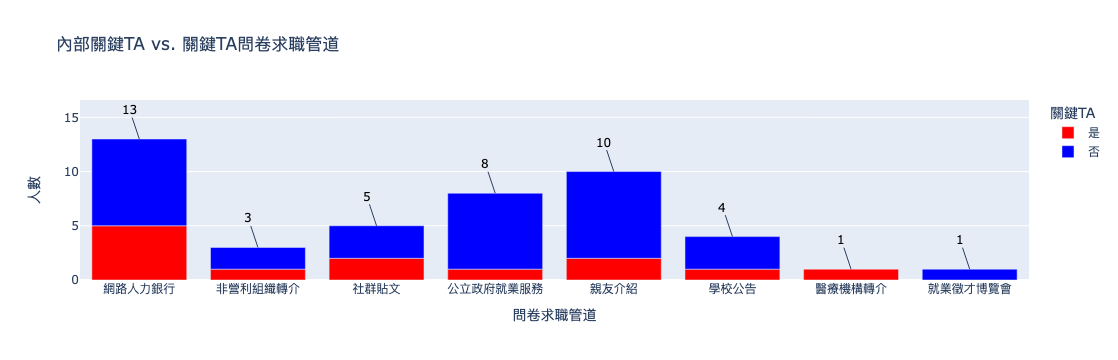

In [34]:
def generate_job_channel_charts(ta_df, nonta_df, title='問卷求職管道'):
    # Count job considerations for both subsets
    jc_true = ta_df['問卷求職管道'].str.split('、').explode().str.strip()
    jc_false = nonta_df['問卷求職管道'].str.split('、').explode().str.strip()
    jc_counts_true = pd.Series(Counter(jc_true)).reset_index()
    jc_counts_false = pd.Series(Counter(jc_false)).reset_index()
    jc_counts_true.columns = ['問卷求職管道', '人數']
    jc_counts_false.columns = ['問卷求職管道', '人數']
    jc_counts_true['關鍵TA'] = '是'
    jc_counts_false['關鍵TA'] = '否'
    combined_counts_with_key_TA = pd.concat([jc_counts_true, jc_counts_false])
    total_counts = combined_counts_with_key_TA.groupby('問卷求職管道')['人數'].sum().reset_index()

    fig = px.bar(combined_counts_with_key_TA, x='問卷求職管道', y='人數', color='關鍵TA',
                 title=title,
                 labels={'人數': '人數', '問卷求職管道': '問卷求職管道', '關鍵TA': '關鍵TA'},
                 color_discrete_sequence=['red','blue'])
    
    # Add text annotations for total counts
    for i, row in total_counts.iterrows():
        fig.add_annotation(
            x=row['問卷求職管道'],
            y=row['人數'],
            text=str(row['人數']),
            showarrow=True,
            font=dict(
                size=12,
                color="black"
            )
        )
    fig.show()

generate_job_channel_charts(ta_df, nonta_df, '關鍵TA vs 非關鍵TA 問卷求職管道')
generate_job_channel_charts(outside_ta_df, nonta_df, '外部關鍵TA vs. 非關鍵TA 問卷求職管道')
generate_job_channel_charts(inside_ta_df, nonta_df, '內部關鍵TA vs. 關鍵TA問卷求職管道')